In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/heart_disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.isnull().value_counts()

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   target
False  False  False  False     False  False  False    False    False  False    False  False  False  False     303
Name: count, dtype: int64

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

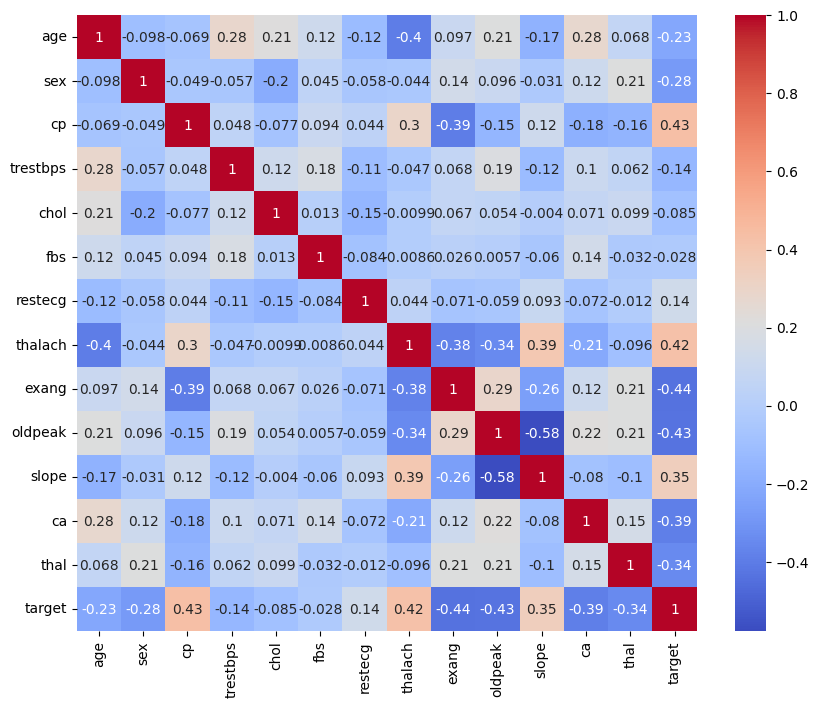

In [16]:
plt.figure(figsize=(10,8), facecolor='white')
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()


In [17]:
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

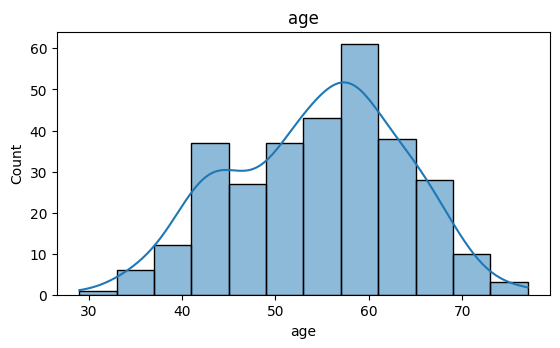

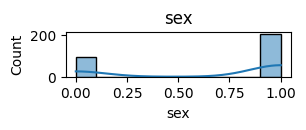

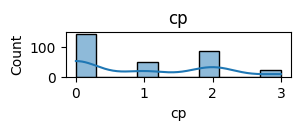

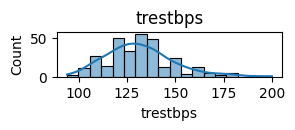

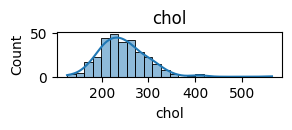

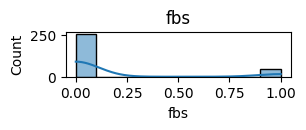

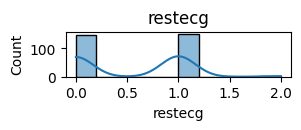

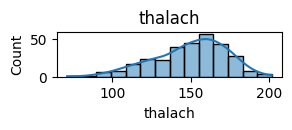

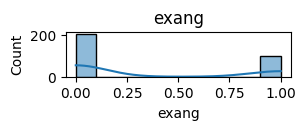

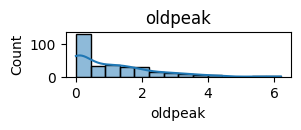

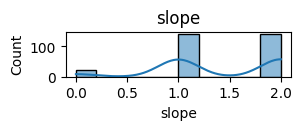

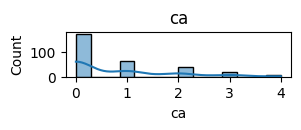

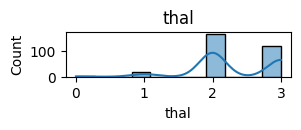

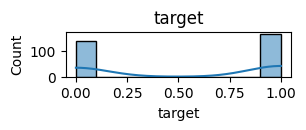

In [24]:
plt.figure(figsize=(14, 28), facecolor='white')
for i, column in enumerate(df.columns, 1):
    plt.subplot(7,2,i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.show()

In [25]:
df1=df.copy()

In [26]:
df1.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1


In [27]:
df1.shape

(303, 14)

In [28]:
x=df1.drop('target',axis=1)

In [29]:
x.shape

(303, 13)

In [30]:
y=df1['target']

In [31]:
y.shape

(303,)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=43)


In [36]:
x_train.shape

(242, 13)

In [37]:
x_test.shape

(61, 13)

In [38]:
y_train.shape

(242,)

In [39]:
y_test.shape

(61,)

FINDING BEST RANDOM STATE

In [40]:
max_acc = 0
max_rs = 0

for i in range(1, 300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=i)
    mnb= MultinomialNB()
    mnb.fit(x_train, y_train)
    pred = mnb.predict(x_test)
    acc_report = accuracy_score(y_test, pred)

    if acc_report > max_acc:
        max_acc = acc_report
        max_rs = i

    # Print accuracy for each random state
    print("Accuracy Score at Random State", i, "is", acc_report)

# Print the maximum accuracy and corresponding random state
print("Maximum Accuracy Score is", max_acc, "at Random State", max_rs)

Accuracy Score at Random State 1 is 0.6885245901639344
Accuracy Score at Random State 2 is 0.8360655737704918
Accuracy Score at Random State 3 is 0.7868852459016393
Accuracy Score at Random State 4 is 0.7868852459016393
Accuracy Score at Random State 5 is 0.7377049180327869
Accuracy Score at Random State 6 is 0.7377049180327869
Accuracy Score at Random State 7 is 0.7704918032786885
Accuracy Score at Random State 8 is 0.7704918032786885
Accuracy Score at Random State 9 is 0.7213114754098361
Accuracy Score at Random State 10 is 0.7049180327868853
Accuracy Score at Random State 11 is 0.7213114754098361
Accuracy Score at Random State 12 is 0.7213114754098361
Accuracy Score at Random State 13 is 0.819672131147541
Accuracy Score at Random State 14 is 0.6885245901639344
Accuracy Score at Random State 15 is 0.819672131147541
Accuracy Score at Random State 16 is 0.7540983606557377
Accuracy Score at Random State 17 is 0.7049180327868853
Accuracy Score at Random State 18 is 0.8032786885245902
Acc

In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=152)
mnb= MultinomialNB()
mnb.fit(x_train, y_train)
pred = mnb.predict(x_test)
acc_report = accuracy_score(y_test, pred)
print("Accuracy Score ", accuracy_score(pred,y_test))
print("Confusion Matrix ", confusion_matrix(pred,y_test))
print("Classfication Reports ", classification_report(pred,y_test))

Accuracy Score  0.8852459016393442
Confusion Matrix  [[28  4]
 [ 3 26]]
Classfication Reports                precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.87      0.90      0.88        29

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [44]:
from sklearn.model_selection import GridSearchCV


In [45]:
mnb_model = MultinomialNB()

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_prior': [True, False]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=mnb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters found by Grid Search
print(f"Best Parameters: {grid_search.best_params_}")

# Best estimator
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Best Parameters: {'alpha': 10, 'fit_prior': True}
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        31
           1       0.86      0.83      0.85        30

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Final Model

In [49]:
mnb= MultinomialNB(alpha = 10, fit_prior = True)
mnb.fit(x_train,y_train)
pred=mnb.predict(x_test)

print("Accuracy Score ", accuracy_score(pred,y_test))
print("Confusion Matrix ", confusion_matrix(pred,y_test))
print("Classfication Reports ", classification_report(pred,y_test))

Accuracy Score  0.8524590163934426
Confusion Matrix  [[27  5]
 [ 4 25]]
Classfication Reports                precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.83      0.86      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



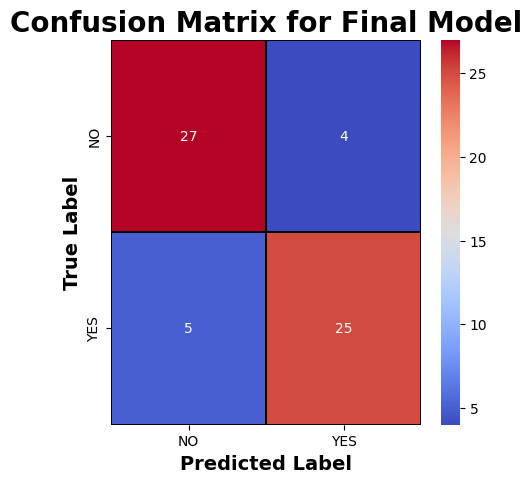

In [50]:
Matrix = confusion_matrix(y_test, pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,
            cmap="coolwarm", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

# **PREDICTION**

In [51]:
prediction = mnb.predict(x_test)


In [53]:
import numpy as np

In [54]:
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
